In [1]:
# from tqdm import tqdm

# from common.storage.azure_file_storage import AzureFileStorageAdapter, AzureBlobFileSystem

# tqdm.pandas(desc="Progress")

# file_system: AzureBlobFileSystem = AzureFileStorageAdapter('data').get_file_storage()

In [2]:
# display("== Obtaining GPT Model ==")
# file_system.download('models/sd-prompt-bot-bruh', 'sd-prompt-bot', recursive=True)

In [3]:
gpt_dir = 'sd-prompt-bot'

In [4]:
import torch
import random
from transformers import GPT2LMHeadModel, GPT2Tokenizer

def get_captions():
	subs = ['AesPleasingAsianGirls', 'AmIhotAF', 'Amicute', 'AsianInvasion', 'AsianOfficeLady', 'CityPorn',
			'CollaredDresses', 'DLAH', 'Dresses', 'DressesPorn', 'EarthPorn', 'HotGirlNextDoor', 'Ifyouhadtopickone',
			'KoreanHotties', 'PrettyGirls', 'SFWNextDoorGirls', 'SFWRedheads', 'SlitDresses', 'TrueFMK',
			'WomenInLongDresses', 'amihot', 'bathandbodyworks', 'celebrities', 'cougars_and_milfs_sfw',
			'fatsquirrelhate',
			'gentlemanboners', 'hotofficegirls', 'itookapicture', 'prettyasiangirls', 'realasians', 'selfies',
			'sexygirls',
			'sfwpetite', 'tightdresses']

	question = f"<|startoftext|> <|model|> {random.choice(subs)}"

	_prompt = f"{question}"

	device = torch.device(f"cuda:1" if torch.cuda.is_available() else "cpu")

	model = GPT2LMHeadModel.from_pretrained(gpt_dir)

	tokenizer = GPT2Tokenizer.from_pretrained(gpt_dir)

	generation_prompt = tokenizer(_prompt, add_special_tokens=True, return_tensors="pt")

	model.to(device)

	generation_prompt.to(device)

	inputs = generation_prompt.input_ids

	attention_mask = generation_prompt['attention_mask']

	sample_outputs = model.generate(inputs=inputs,
									attention_mask=attention_mask,
									do_sample=True,
									max_length=1024,
									num_return_sequences=1,
									temperature=.67,
									top_k=30,
									top_p=.3,
									repetition_penalty=1.1)
	for _i, sample_output in enumerate(sample_outputs):
		result = tokenizer.decode(sample_output, skip_special_tokens=False)
		yield result

In [5]:
def validate_message(message):
	try:
		import re
		start_end_regex = re.compile("<\|startoftext\|>(.+?)<\|endoftext\|>")
		prompt_regex = re.compile("<\|model\|>(.+?)<\|title\|>")
		text_regex = re.compile("<\|caption\|>(.+?)<\|endoftext\|>")
		found_start_end = start_end_regex.findall(message)
		if len(found_start_end) == 0:
			return "", ""

		generated_prompt = ""
		generated_text = ""

		found_prompt = prompt_regex.findall(message)
		if len(found_prompt) > 0:
			generated_prompt = found_prompt[0]

		found_text = text_regex.findall(message)
		if len(found_text) > 0:
			generated_text = found_text[0]

		return generated_prompt.strip(), generated_text.strip()
	except Exception as e:
		print(e)
		return "", ""

In [6]:
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("ContinuousDiffusion", revision="fp16", torch_dtype=torch.float32, safety_checker=None, low_cpu_mem_usage=True)
pipe.to("cuda:0")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Some weights of the model checkpoint at ContinuousDiffusion\vae were not used when initializing AutoencoderKL: ['encoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_v.weight', 'decoder.mid_block.attentions.0.to_k.bias', 'decoder.mid_block.attentions.0.to_q.weight', 'decoder.mid_block.attentions.0.to_q.bias', 'decoder.mid_block.attentions.0.to_k.weight', 'encoder.mid_block.attentions.0.to_q.weight', 'decoder.mid_block.attentions.0.to_out.0.bias', 'decoder.mid_block.attentions.0.to_v.bias', 'encoder.mid_block.attentions.0.to_k.bias', 'encoder.mid_block.attentions.0.to_out.0.bias', 'encoder.mid_block.attentions.0.to_k.weight', 'encoder.mid_block.attentions.0.to_out.

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'prettyasiangirls - Cute bikini girl, a woman in garments posing for a picture on the beach, in the style of r/prettyasiangirls'

  0%|          | 0/100 [00:00<?, ?it/s]

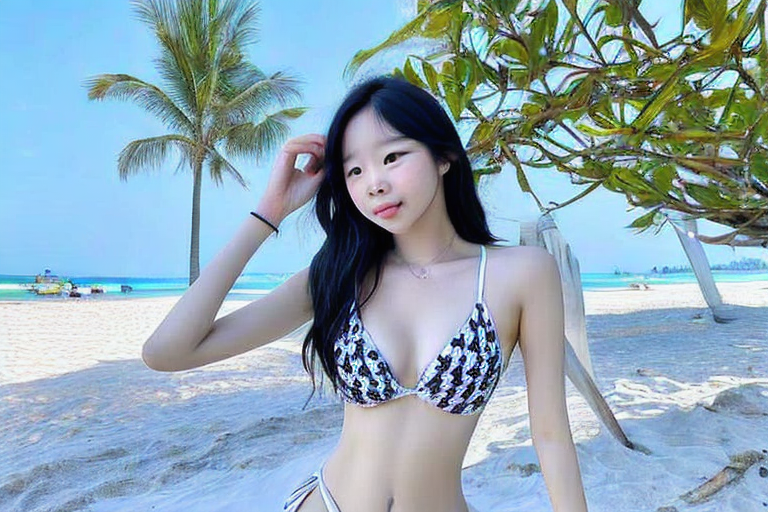

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'CollaredDresses - Black and White, a woman in black dress standing on steps with her legs crossed, in the style of r/CollaredDresses'

  0%|          | 0/100 [00:00<?, ?it/s]

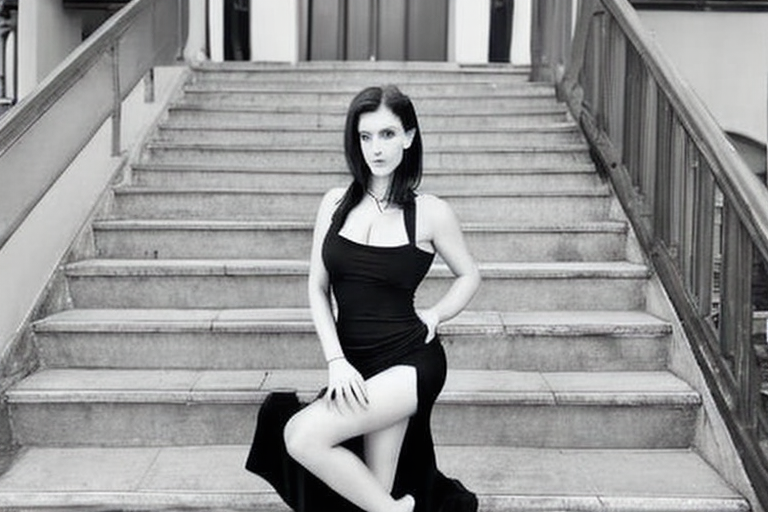

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'DLAH - Black Dress, a woman in black dress standing on steps with her legs crossed and heels high, in the style of r/DLAH'

  0%|          | 0/100 [00:00<?, ?it/s]

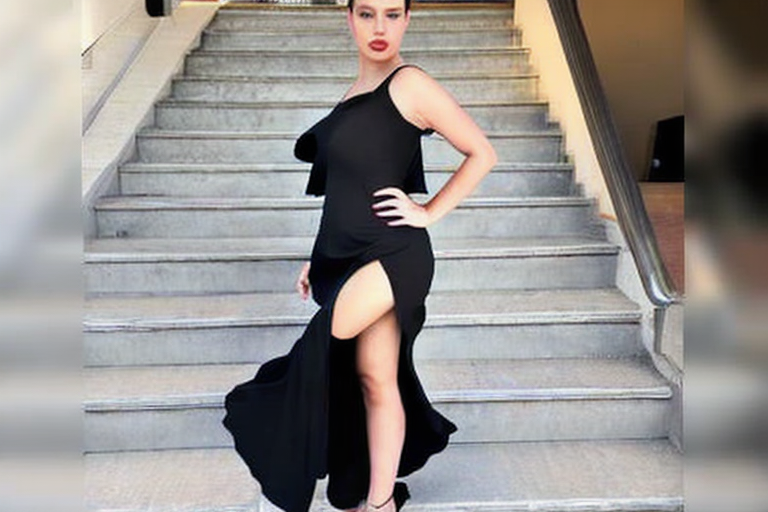

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'sexygirls - Emily Elizabeth, a woman in lingerie sitting on the floor with her legs crossed and heels high, in the style of r/sexygirls'

  0%|          | 0/100 [00:00<?, ?it/s]

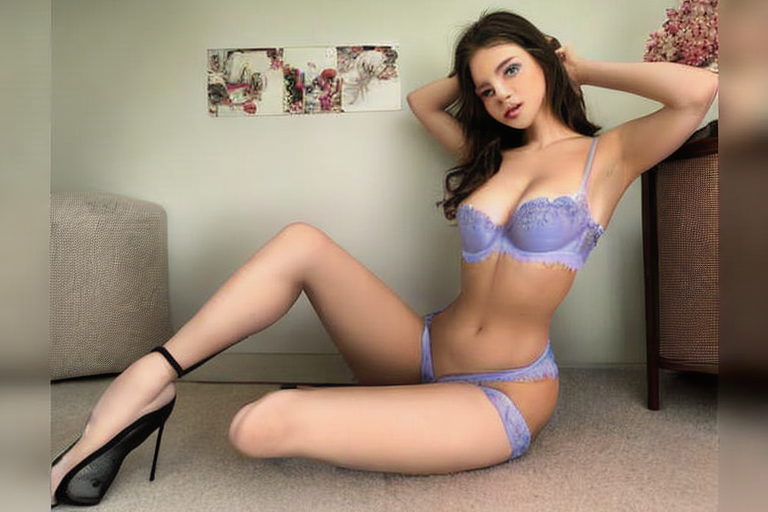

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'KoreanHotties - Cute bikini girl, a woman in garments posing for a picture on the beach, in the style of r/KoreanHotties'

  0%|          | 0/100 [00:00<?, ?it/s]

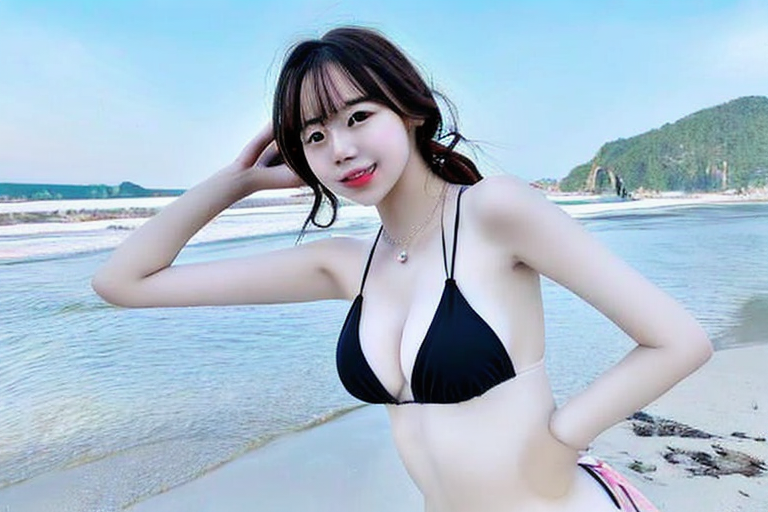

In [7]:
i = 0
while i < 5:
	for caption in get_captions():
		title, prompt = validate_message(caption)
		display(f"{title} - {prompt}")
		image = pipe(prompt, height=512, width=768, guidance_scale=12, num_inference_steps=100).images[0]
		display(image)
		i += 1